# Validation tests

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [135]:
# !python3 idsp_parser.py /data/datasets/Projects/PODCAST/country_disease_outbreaks/india/idsp_reporting/

531
total number of outbreaks 17376
number of pre2016 outbreaks 10335
number of post2016 outbreaks 7041
 38%|█████████████▉                       | 6573/17376 [00:46<01:26, 124.40it/s]^C
Traceback (most recent call last):
  File "idsp_parser.py", line 235, in <module>
    outbreaks.loc[i] = outbreak_parser(raw)
  File "/users/rsg/anla/anaconda3/envs/geospatial/lib/python3.7/site-packages/pandas/core/indexing.py", line 205, in __setitem__
    self._setitem_with_indexer(indexer, value)
KeyboardInterrupt
 38%|█████████████▉                       | 6573/17376 [00:46<01:16, 141.21it/s]


In [136]:
df = pd.read_csv('IDSP_data.csv')

In [137]:
df.start_date = pd.to_datetime(df.start_date, errors='coerce')
df.cases = pd.to_numeric(df.cases, errors='coerce')
df.deaths = pd.to_numeric(df.deaths, errors='coerce')

In [138]:
df.shape, df.dropna().shape

((17376, 12), (13904, 12))

## validation by number of outbreaks per year

![](https://idsp.nic.in/WriteReadData/p92g8/14905638241465897454.png)

A total of 553 outbreaks were reported in 2008, 799 outbreaks in 2009, 990 outbreaks in 2010, 1675 outbreaks in 2011, 1584 outbreaks in 2012, 1964 outbreaks in 2013, 1562 in 2014 and 1935 in 2015,2679 in 2016 and 1714 have been reported in 2017. Majority of the reported outbreaks included those of Acute Diarrhoeal Diseases, Food Poisoning and Measles. The weekly outbreak report generated by the CSU is shared with all key stakeholders including the Prime Minister’s Office.

In [139]:
year_count_true = dict(zip([a for a in range(2008,2020)],[553,779,990,1675,1584,1964,1562,1935,2679,1714]))

In [140]:
year_count_true

{2008: 553,
 2009: 779,
 2010: 990,
 2011: 1675,
 2012: 1584,
 2013: 1964,
 2014: 1562,
 2015: 1935,
 2016: 2679,
 2017: 1714}

In [141]:
year_count = {}
for year in range(2000,2030):
    year_count[year] = df[df.start_date.dt.year == year].shape[0]

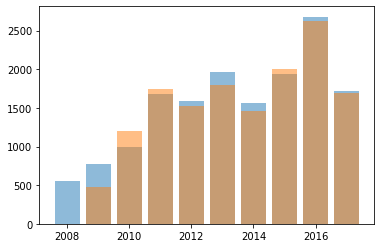

In [142]:
plt.figure()
plt.bar(range(2008,2018),[year_count_true[a] for a in range(2008,2018)],alpha=0.5)
plt.bar(range(2008,2018),[year_count[a] for a in range(2008,2018)],alpha=0.5)

plt.show()

## State disease year wise data

In [143]:
pwd

'/users/rsg/anla/code/idsp_converter'

In [144]:
ls

cleaning_and_merging_outbreaks_with_geospatial.ipynb  IND_outbreaks.cpg
disease_names.txt                                     IND_outbreaks.dbf
district_names.txt                                    IND_outbreaks.prj
download_idsp_data.ipynb                              IND_outbreaks.shp
err_log.txt                                           IND_outbreaks.shx
IDSP_data.csv                                         state_names.txt
idsp_parser.py                                        Validation.ipynb


In [277]:
from tabula import read_pdf

statewise_yearly={}
for pdf in glob('/users/rsg/anla/podcast/country_disease_outbreaks/india/*.pdf'):
    print(pdf)
    statewise_yearly[pdf[-8:-4]] = read_pdf(pdf, lattice=True, pandas_options={'header':0}).fillna(0)

/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2011.pdf
/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2012.pdf
/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2013.pdf
/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2014.pdf
/users/rsg/anla/podcast/country_disease_outbreaks/india/obrk_2015.pdf


In [305]:
statewise_yearly['2015'].iloc[:10]['Cholera']

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
5    0.0
6    4.0
7    0.0
8    2.0
9    0.0
Name: Cholera, dtype: float64

In [279]:
statewise_yearly['2011'] = statewise_yearly['2011'].rename(columns=dict(zip(statewise_yearly['2011'].columns,'''S.No. 
State
Acute Diarrhoeal Disease
Acute Encephalitis Syndrome
Acute Flaccid Paralysis
Acute Respiratory Illness
Anthrax
Chicken Pox
Chikungunya
Cholera
Crimean-Congo
Hemorrhagic Fever
Dengue
Diphtheria
Dysentery
Enteric Fever
Epidemic Dropsy
Food Poisoning
Gas Poisoning
Kala-Azar
Kyasanur Forest Disease
Leptospirosis
Malaria
Measles
Meningitis
Mumps
Rubella
Scrub Typhus
Sub-cutaneous worm
Viral Fever
Viral Hepatitis
Viral Hepatitis B & C
Vitamin A overdosage
Grand Total'''.split('\n'))))

In [280]:
statewise_yearly['2012'] = statewise_yearly['2012'].rename(columns=dict(zip(statewise_yearly['2012'].columns,
                                                                            '''S.No.
State
Acute Diarrhoeal Disease
Acute Encephalitis Syndrome
Acute Respiratory Infection
Alcohol Poisoning
Anthrax
Chickenpox
Chikungunya
Cholera
Crimean Congo
Hemorrhagic Fever
Dengue
Diphtheria
Enteric Fever
Epidemic Dropsy
Food Poisoning
Hand Foot and Mouth Disease
Influenza A H1N1
Influenza A H3N2
Influenza B
Kala-Azar
KFD
Leptospirosis
Malaria
Measles
Mumps
Mushroom Poisoning
Rubella
Scrub Typhus
Trichinellosis
Viral Exanthemas
(Multiple papulopustular lesions)
Viral Fever
Viral Hepatitis
Viral Hepatitis B
Viral Hepatitis C
Grand Total'''.split('\n'))))

In [281]:
statewise_yearly['2013'] = statewise_yearly['2013'].rename(columns=dict(zip(statewise_yearly['2013'].columns,
                                                                            '''#
State
Acute Diarrhoeal Disease
Acute Encephalitis Syndrome
Alcohol Poisoning
Anthrax
Chickenpox
Chikungunya
Cholera
Crimean-Congo
Haemorrhagic fever
(CCHF)
Dengue
Diphtheria
Drug Side Effects
Enteric Fever
Food Poisoning
Hand Foot and Mouth Disease
Influenza A H1N1
Influenza B
Kala Azar
Leptospirosis
Lyme Disease
Malaria
Measles
Mumps
Mushroom Poisoning
Pertusis
Rubella
Scrub Typhus
Viral Fever
Viral Hepatitis
Viral Hepatitis C
Grand Total'''.split('\n'))))

In [302]:
statewise_yearly['2014'] = statewise_yearly['2014'].rename(columns=dict(zip(statewise_yearly['2014'].columns,
                                                                            '''S.No.
State
Acute Diarrhoeal Disease
Acute Encephalitis Syndrome
Acute Respiratory Infection
Alcohal Poisoning
Anthrax
Brucellosis
Chickenpox
Chikungunya
Cholera
Crimean Congo
Haemorrhagic Fever (CCHF)
Dengue
Diphtheria
Dysentry
Enteric Fever
Food Poisoning
Kyasanur Forest
Disease
Leptospirosis
Malaria
Measles
Mumps
Mushroom
Poisoning
Pertusis
Rubella
Scrub Typhus
Trichinella
Viral encephalitis
(Chandipura)
Viral Fever
Viral Hepatitis
Grand Total'''.split('\n'))))

In [283]:
statewise_yearly['2015'] = statewise_yearly['2015'].rename(columns=dict(zip(statewise_yearly['2015'].columns,
                                                                            '''S.No.
State
Acute Diarrheal Disease
Acute Encephalitis Syndrome
Acute Flaccid Paralysis
Alcohol Poisoning
Anthrax
Castor Seed Poisoning
Chandipura Viral Encephalitis
Chickenpox
Chikungunya
Cholera
Crimean Congo
Haemorrhagic Fever (CCHF)
Dengue
Diphtheria
Dysentery
Enteric Fever
Epidemic Dropsy
Fever with altered sensorium
Fever with Rash
Food Poisoning
Hand Foot Mouth Disease
Influenza A (h1n1)
Influenza B
Jaundice
Kala Azar
KFD
Leptospirosis
Malaria
Measles
Mumps
Mushroom Poisoning
Rubella
Scrub Typhus
Viral Encephalitis
Viral Fever
Viral Hepatitis
Viral Hepatitis C
Grand Total'''.split('\n'))))

/users/rsg/anla/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


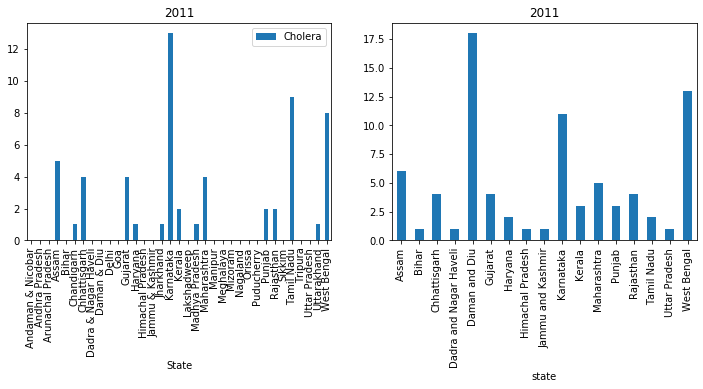

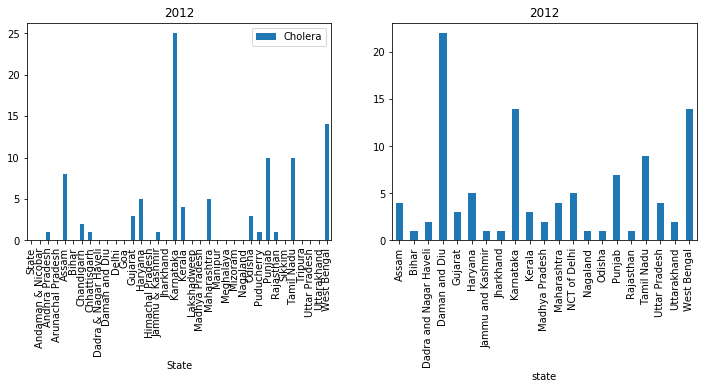

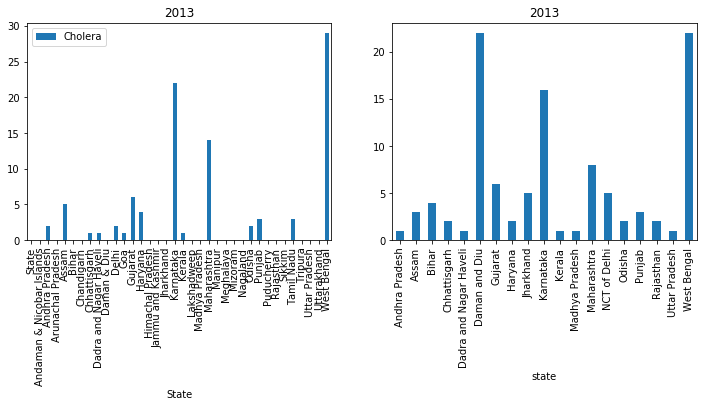

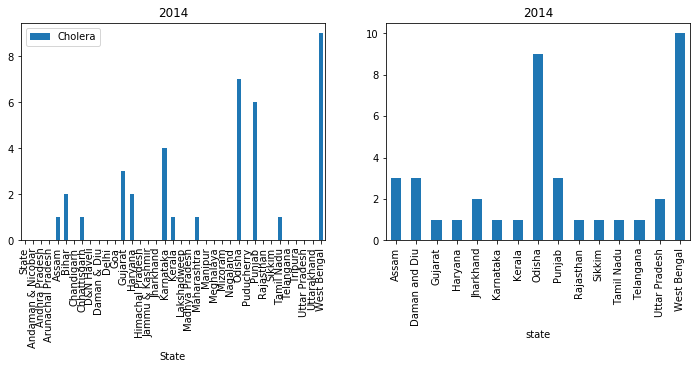

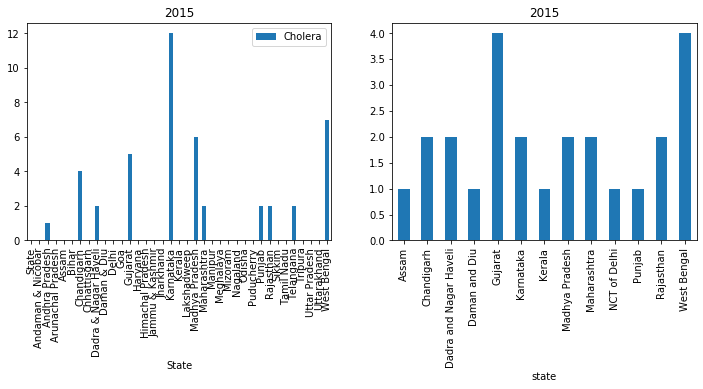

In [306]:
for year in range(2011,2016):
    if 'Cholera' in statewise_yearly[str(year)].columns:
        
        fig, ax = plt.subplots(1,2,figsize=(12,4))
        statewise_yearly[str(year)][['State','Cholera']].iloc[:-1].plot.bar(x='State',title=str(year),ax=ax[0])
        df[df.start_date.dt.year == year][df.disease=='Cholera'].groupby('state')['raw'].count().plot.bar(x='state',ax=ax[1],title=str(year))
        plt.show()